### Regressão por árvore de decisão - Exemplo básico para predição de valores
Para esse exemplo utilizamos a biblioteca scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import epmwebapi as epm
import datetime
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

**Conecta ao EPM Webserver e busca duas variáveis interpoladas a cada 10 minutos em um período de 30 dias**

In [2]:
import getpass
user = input('EPM user:')
password = getpass.getpass("EPM password:")

connection = epm.EpmConnection('http://localhost:44333', 'http://localhost:44332', user, password)

wind = 'SP01_WindSpeedAvg'
power = 'SP01_PowerAvg'
initime = datetime.datetime(2014, 2, 2, 0, 0, 0, 0)

endtime = initime + datetime.timedelta(days=30)

bv_wind = connection.getDataObjects([wind])
bv_power = connection.getDataObjects([power])



queryperiod = epm.QueryPeriod(initime, endtime)
processInterval = datetime.timedelta(seconds=600)
aggregationdetails = epm.AggregateDetails(processInterval, epm.AggregateType.Interpolative)

data1 = bv_power[power].historyReadAggregate(aggregationdetails, queryperiod)
data2 = bv_wind[wind].historyReadAggregate(aggregationdetails, queryperiod)

#fechando a conexão
connection.close()

**Converte o array para Pandas e ajusta o formato**

In [3]:
df1 = pd.DataFrame(
        {'Value': data1['Value'].tolist()})

df2 = pd.DataFrame(
        {'Value': data2['Value'].tolist()})

y = df1.iloc[:, 0:1].values

X = df2.iloc[:, 0:1].values

**Cria valores para testar a predição**

In [4]:
#test data to predict
X_test = np.array([0, 3, 6, 9, 12, 15, 18])
X_test = X_test.reshape(-1, 1)

**Treina o modelo com profundidade 2 e 5 e realiza o teste de predição**

In [5]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X_test)
      
y_2 = regr_2.predict(X_test)

**Plota os resultados**

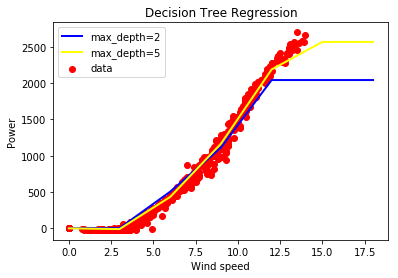

In [7]:
plt.figure()
plt.scatter(X, y, color='red', label="data")
plt.plot(X_test, regr_1.predict(X_test), color="blue", label="max_depth=2", linewidth=2)
plt.plot(X_test, regr_2.predict(X_test), color="yellow", label="max_depth=5", linewidth=2)
plt.xlabel("Wind speed")
plt.ylabel("Power")
plt.title("Decision Tree Regression")
plt.legend()